<a href="https://colab.research.google.com/github/Sajjad-Anwar/spam-email-detection-self/blob/main/SpamSelf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [1]:
!pip install streamlit pandas scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.1 MB/s eta 0:00:00


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import streamlit as st

# **Load the Dataset**

In [3]:
# Load the dataset
df = pd.read_csv('/content/emails.csv')

# Display the first few rows
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


# **Data Preprocessing**

In [4]:
# Function to clean email text
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = text.lower()               # Convert to lowercase
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text

# Apply the cleaning function to the text column
df['text'] = df['text'].apply(clean_text)

#  **Exploratory Data Analysis (EDA)**

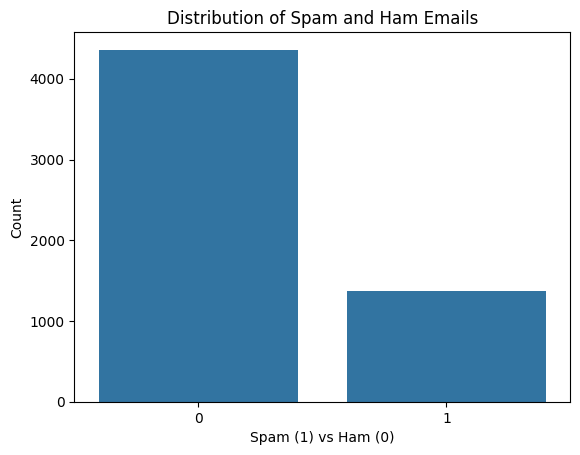

In [5]:
# Visualize the distribution of spam and ham emails
sns.countplot(x='spam', data=df)
plt.title('Distribution of Spam and Ham Emails')
plt.xlabel('Spam (1) vs Ham (0)')
plt.ylabel('Count')
plt.show()

# **Split the Dataset in to Training and Testing Sets**

In [6]:
# Split the dataset into features and target variable
X = df['text']
y = df['spam']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Feature Extraction**

In [7]:
# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_vectorized = vectorizer.transform(X_test)

# **Train the Model**

In [8]:
# Initialize the Multinomial Naive Bayes classifier
model = MultinomialNB()

# Fit the model on the training data
model.fit(X_train_vectorized, y_train)

MultinomialNB()

#**  Model Evaluation**

Accuracy: 98.78%


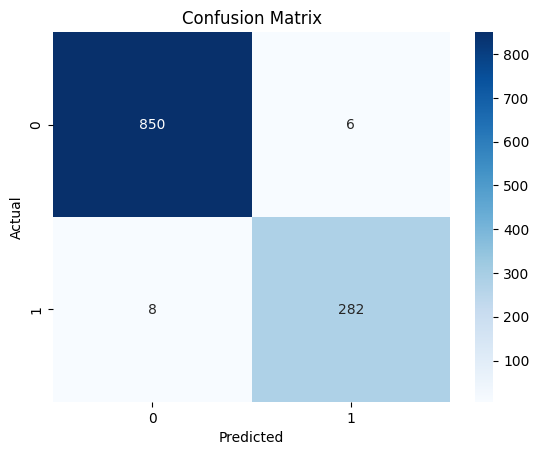

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       856
           1       0.98      0.97      0.98       290

    accuracy                           0.99      1146
   macro avg       0.98      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146



In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print(report)

# **Deployment with Streamlit**

In [10]:
# Save the trained model and vectorizer
import joblib

joblib.dump(model, 'spam_detector_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

# Streamlit app

['vectorizer.pkl']

In [11]:
import streamlit as st
import joblib
import pandas as pd

# Load the model and vectorizer
model = joblib.load('spam_detector_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')

# Streamlit app title
st.title("Spam Email Detection System")

# User input for email text
input_text = st.text_area("Enter your email text:")

# Predict button
if st.button("Predict"):
    # Preprocess and vectorize the input
    cleaned_input = clean_text(input_text)
    input_vectorized = vectorizer.transform([cleaned_input])

    # Make prediction
    prediction = model.predict(input_vectorized)

    # Display the result
    if prediction[0] == 1:
        st.write("This email is Spam.")
    else:
        st.write("This email is Not Spam.")

2024-10-18 04:10:02.508 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-18 04:10:02.728 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-10-18 04:10:02.730 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-18 04:10:02.735 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-18 04:10:02.738 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-18 04:10:02.742 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-18 04:10:02.743 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-18 04:10:02.745 Session state does not 